In [146]:
%matplotlib notebook

import numpy              as np
import matplotlib.pyplot  as plt
from scipy.interpolate    import interp1d
from scipy                import integrate
from scipy                import signal
from astropy.io           import fits
from scipy                import stats
from scipy                import optimize


<IPython.core.display.Javascript object>


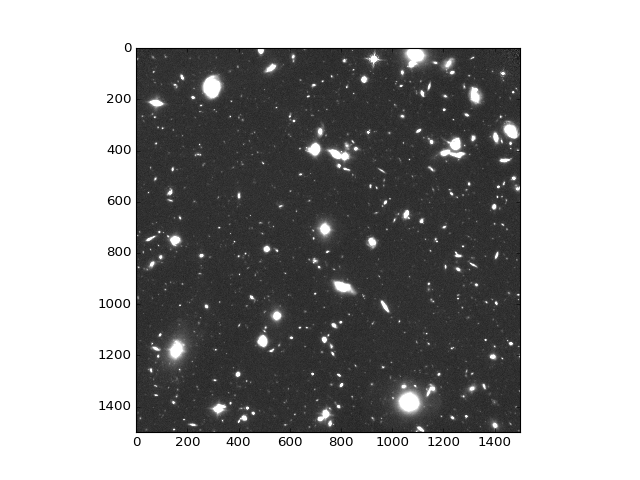

In [147]:
nbins_min = 1500
pixels_with_noise = fits.open('/home/maryhallow/Desktop/python/Reionizatoin/Reion/hlsp_hlf_hst_wfc3-60mas_goodss'
                              '_f160w_v1.0_sci.fits')[0].data[13200:13200+nbins_min,9700:9700+nbins_min]

plt.figure(1)
plt.imshow(pixels_with_noise[::-1,:],interpolation='nearest',vmax=np.max(pixels_with_noise)/99.5/5,cmap=plt.cm.gray)

In [148]:
data_array = np.reshape(pixels_with_noise,(nbins_min*nbins_min,))
pdf = stats.gaussian_kde(data_array)           # building probability density function

grid_points_x = np.concatenate([np.linspace(np.min(data_array),0.03,1000),np.linspace(0.03,1,1000)[1:]])
grid_points_pdf = pdf.evaluate(grid_points_x)

grid_points_cdf = np.zeros_like(grid_points_x) # building culumative density function
for i in range(0,len(grid_points_x)):
    for j in range(1,i+1):
        grid_points_cdf[i] += (grid_points_x[j]-grid_points_x[j-1])*grid_points_pdf[j]

<IPython.core.display.Javascript object>


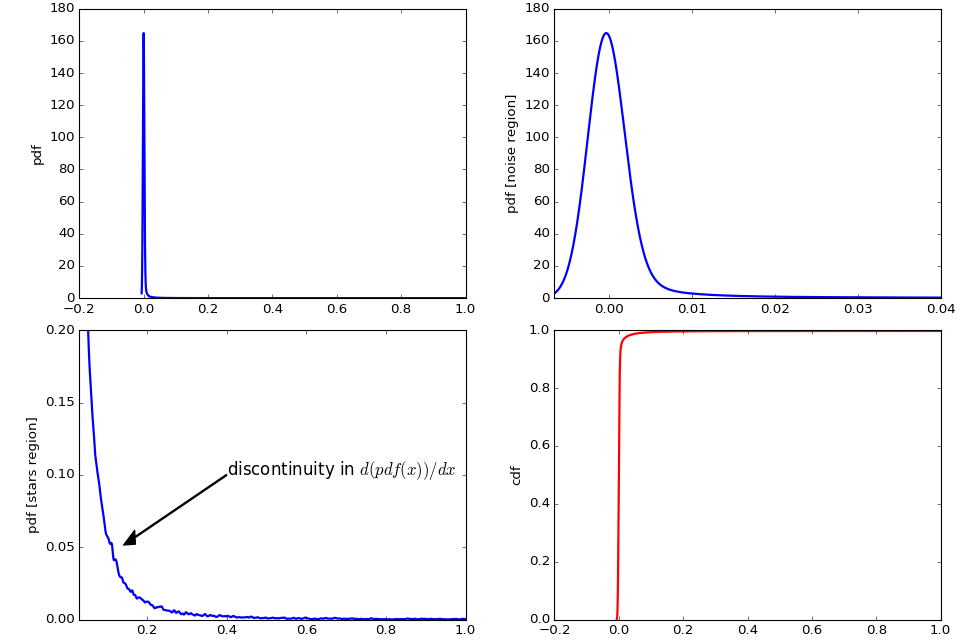

In [149]:
plt.figure(2)

plt.subplot(2,2,1)
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.plot(grid_points_x,grid_points_pdf,lw=2.)
plt.ylabel('pdf')

plt.subplot(2,2,2)
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.plot(grid_points_x,grid_points_pdf,lw=2.)
plt.xticks(np.array([0.0,0.01,0.02,0.03,0.04]))
plt.xlim(np.min(data_array),0.04)
plt.ylabel('pdf [noise region]')

plt.subplot(2,2,3)
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.plot(grid_points_x,grid_points_pdf,lw=2.)
plt.arrow(0.4 , 0.1,-0.23, -0.043, head_width=0.01, head_length=0.03, fc='k', ec='k')
plt.text(0.4,0.1,'discontinuity in $d(pdf(x))/dx$', fontsize=15)
plt.xlim(0.03,1)
plt.ylim(0,0.2)
plt.ylabel('pdf [stars region]')

plt.subplot(2,2,4)
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.plot(grid_points_x,grid_points_cdf,c='r',lw=2.)
plt.ylabel('cdf')



In [152]:
def f(x,a,b):
    return stats.norm.pdf(x,a,b)

# fitting procedure
popt, pcov = optimize.curve_fit(f,grid_points_x[:500],grid_points_pdf[:500],bounds=([-0.1,0.0], [0.1, 0.1]))
print(popt)

[-0.00020178  0.00239519]


<IPython.core.display.Javascript object>


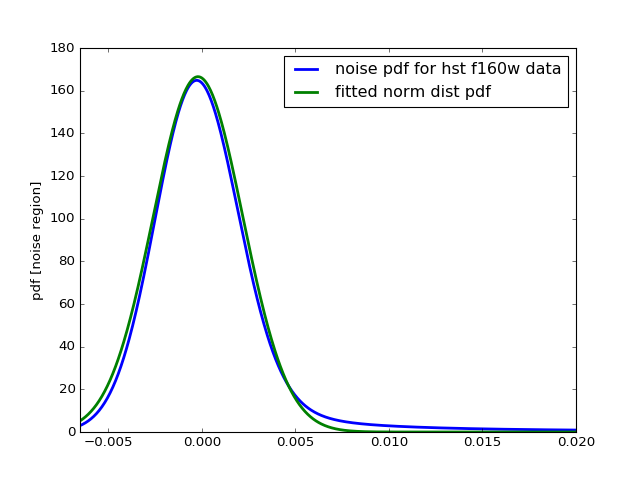

In [153]:
plt.figure(3)
plt.plot(grid_points_x,grid_points_pdf,lw=2.5,label='noise pdf for hst f160w data')
plt.plot(grid_points_x,f(grid_points_x,popt[0],popt[1]),lw=2.5,label='fitted norm dist pdf')
plt.xlim(np.min(data_array),0.02) 
plt.legend(loc='upper right')
plt.ylabel('pdf [noise region]')

max value =  0.00704562786649
mean value =  -0.00322715115498
std =  0.00319139482913


CTYPE1  ='RA---TAN'                                                              [astropy.io.fits.card]
CTYPE2  ='DEC--TAN'                                                              [astropy.io.fits.card]
DATE-OBS='2009-12-13'                                                            [astropy.io.fits.card]
TIME-OBS='21:23:07'                                                              [astropy.io.fits.card]
ROOTNAME='ibcj03kdq                                                              [astropy.io.fits.card]
TARGNAME='OMEGACEN                                                               [astropy.io.fits.card]
FILTER1 =                                                                        [astropy.io.fits.card]
FILTER2 =                                                                        [astropy.io.fits.card]


<IPython.core.display.Javascript object>


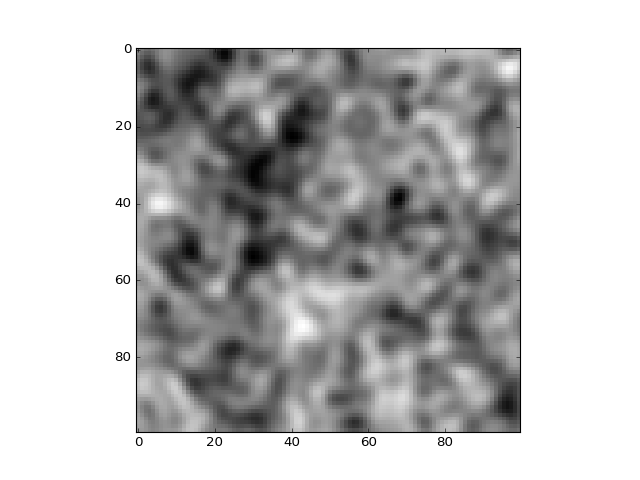

In [156]:
# now let's make use of just built probability density fucntion of normal distribution and create the noise data 
nbins_min = 100
noise = stats.norm.rvs(popt[0],popt[1],nbins_min*nbins_min)
noise = np.reshape(noise,(nbins_min,nbins_min))
PSF = fits.open('psf_wfc3ir_f160w.fits')[0].data
noise = signal.fftconvolve(noise, PSF, mode='same')

print('max value = ',np.max(noise))
print('mean value = ',np.mean(noise))
print('std = ',np.std(noise))

plt.figure(4)
plt.imshow(noise, interpolation='nearest',cmap=plt.cm.gray)

<IPython.core.display.Javascript object>


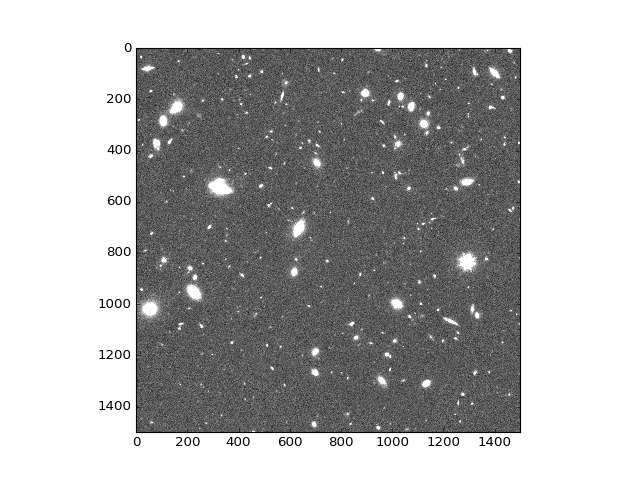

In [159]:
# let's consider a different space region of HLF data (less deep than we've taken above)
# and see whether the noise pdf will change or not.

nbins_min = 1500
pixels_with_noise_2 = fits.open('/home/maryhallow/Desktop/python/Reionizatoin/Reion/hlsp_hlf_hst_wfc3-60mas_goodss'
                              '_f160w_v1.0_sci.fits')[0].data[13200:13200+nbins_min,12500:12500+nbins_min]

plt.figure(5)
plt.imshow(pixels_with_noise_2[::-1,:],interpolation='nearest',vmax=np.max(pixels_with_noise)/99.5/5,cmap=plt.cm.gray)

In [161]:
data_array_2 = np.reshape(pixels_with_noise_2,(nbins_min*nbins_min,))
pdf_2 = stats.gaussian_kde(data_array_2)           # building probability density function

grid_points_x_2 = np.concatenate([np.linspace(np.min(data_array_2),0.03,1000),np.linspace(0.03,1,1000)[1:]])
grid_points_pdf_2 = pdf_2.evaluate(grid_points_x_2)

grid_points_cdf_2 = np.zeros_like(grid_points_x_2) # building culumative density function
for i in range(0,len(grid_points_x_2)):
    for j in range(1,i+1):
        grid_points_cdf_2[i] += (grid_points_x_2[j]-grid_points_x_2[j-1])*grid_points_pdf_2[j]

<IPython.core.display.Javascript object>


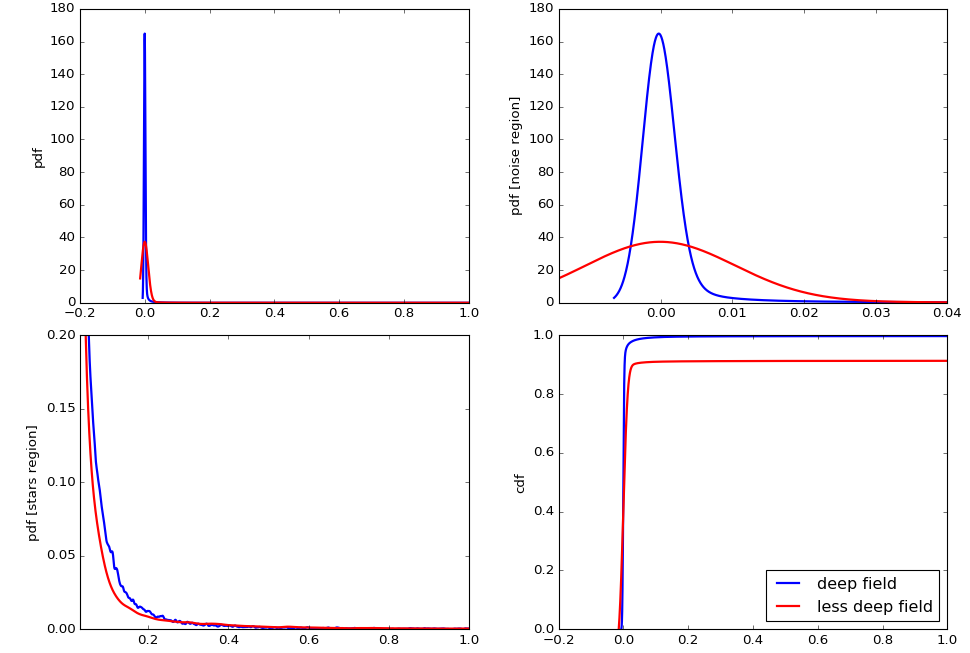

In [162]:
plt.figure(6)

plt.subplot(2,2,1)
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.xlim(-0.2,1)
plt.plot(grid_points_x,grid_points_pdf,c='b',lw=2.,label='deep field')
plt.plot(grid_points_x_2,grid_points_pdf_2,c='r',lw=2.,label='less deep field')
plt.ylabel('pdf')

plt.subplot(2,2,2)
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.plot(grid_points_x,grid_points_pdf,c='b',lw=2.,label='deep field')
plt.plot(grid_points_x_2,grid_points_pdf_2,c='r',lw=2.,label='less deep field')
plt.xticks(np.array([0.0,0.01,0.02,0.03,0.04]))
plt.xlim(np.min(data_array_2),0.04)
plt.ylabel('pdf [noise region]')

plt.subplot(2,2,3)
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.plot(grid_points_x,grid_points_pdf,c='b',lw=2.,label='deep field')
plt.plot(grid_points_x_2,grid_points_pdf_2,c='r',lw=2.,label='less deep field')
plt.xlim(0.03,1)
plt.ylim(0,0.2)
plt.ylabel('pdf [stars region]')

plt.subplot(2,2,4)
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0)
plt.plot(grid_points_x,grid_points_cdf,c='b',lw=2.,label='deep field')
plt.plot(grid_points_x_2,grid_points_cdf_2,c='r',lw=2.,label='less deep field')
plt.legend(loc='lower right')
plt.ylabel('cdf')


In [163]:
popt_2, pcov_2 = optimize.curve_fit(f,grid_points_x_2[:1000],grid_points_pdf_2[:1000],bounds=([-0.1,0.0], [0.1, 0.1]))

nbins_min = 100
noise_2 = stats.norm.rvs(popt_2[0],popt_2[1],nbins_min*nbins_min)
noise_2 = np.reshape(noise_2,(nbins_min,nbins_min))
noise_2 = signal.fftconvolve(noise_2, PSF, mode='same')

print('max value = ',np.max(noise_2))
print('mean value = ',np.mean(noise_2))
print('std = ',np.std(noise_2))


max value =  0.0471419669299
mean value =  -0.00231752381323
std =  0.0147677864757
